In [1]:
import pandas as pd
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
file = '프로허석.json' # Youtube로부터 8/3일 데이터 읽어옴
data = None
with open(file, 'r') as f:
    data=json.load(f)

channel_id, stats = data.popitem()

print(channel_id, '누적뷰: ' + stats['channel_statistics']['viewCount'], 
      '가입자수: ' + stats['channel_statistics']['subscriberCount'] )

UCaZVzqDdG-IPb_zVEsezlJQ 누적뷰: 13821473 가입자수: 131000


In [3]:
video_stats = stats['video_data']

In [4]:
video_data = []
for vid in video_stats.items():
    video_id = vid[0]
    title = vid[1]['title']
    views = int(vid[1]['viewCount'])
    likes = int(vid[1]['likeCount'])
    dislikes = int(vid[1]['dislikeCount'])
    # comments = int(vid[1]['commentCount'])
    release = vid[1]['publishedAt']
    video_data.append([title, views, likes, dislikes, release])

In [5]:
video = pd.DataFrame(video_data, columns=['title','viewCount', 'likeCount', 'dislikeCount','release'])
video['release'] = video['release'].apply(lambda x: x[:10])

In [6]:
video.set_index('title', inplace=True)

In [7]:
video.sort_values(by='viewCount', ascending=False)

video['release'] = pd.to_datetime(video['release'])

## 조회수 기준 상위 30 동영상 제목

In [8]:
video.sort_values('viewCount', ascending=False).head(30) 

,viewCount,likeCount,dislikeCount,release
title,,,,
[골프레슨] 프로들은 이것만 생각해서 공을 똑바로칩니다 여태까지 뭐했나 싶은 영상 오전8시30분 출근길레슨 허석프로,783812,12306,333,2020-02-05
프로로 만들어준 '최고의' 연습방법 '이것만 하세요' 오전8시30분 출근길레슨 허석프로,686205,18618,222,2020-03-25
[출근길레슨] 드라이버 빵!빵!쳐도 똑바로 칠수있다 이것만 지키면 오전8시반 허석프로,535624,8049,211,2020-04-29
"[골프레슨] 똑바로 멀리칠수 있는 허리회전, 저의 레슨을 따라오고싶다면 이건 꼭 보셔야합니다!!!",376900,11105,127,2019-12-24
[골프레슨]팔 뻗기 이것만 하면 여러분도 할수있습니다. 오전8시30분 출근길 레슨 허석프로,360794,8716,116,2019-12-26
SUB) 올바른 다운스윙 연습하자 '마이크밴더가' 알려준 특급 연습법 Golflesson,354585,8773,105,2020-05-03
[출근길레슨] 드라이버는 이렇게 연습하세요 정확성UP! 비거리UP!,293760,6925,105,2020-04-05
SUB) 바디스윙 다 필요없고 이것만 죽어라 하시면 싱글갑니다 꼭 보세요,292153,7739,147,2020-06-21
[골프레슨]힘 빼고 쉽게 멀리치는 레슨 오전 8시30분 출근길 레슨 허석프로(feat.인예상사 골프스윙기),283151,5054,165,2020-01-08


In [9]:
video['viewCount/day'] = video['viewCount'] / ((pd.to_datetime('today') - video['release']).dt.days)
video['viewCount/day'] = video['viewCount/day'].astype('int')

## 일평균 조회수 기준 상위 30위 (등록일 보정)

In [10]:
video.sort_values('viewCount/day', ascending=False).head(30) 

,viewCount,likeCount,dislikeCount,release,viewCount/day
title,,,,,
SUB) 하나의 차이가 30미터를 만들어 냅니다. 출근길레슨 허석프로,17465,975,10,2020-08-02,17465
SUB)힙 스웨이를 하면 힘이 안들어가는 이유 ㅣ출근길레슨 허석프로,90828,3031,21,2020-07-26,11353
SUB) 바디스윙 1단계 팔꿈치 사용 ㅣ출근길레슨 허석프로,40692,1411,18,2020-07-29,8138
"SUB) 왼팔은 ""자동으로"" 펴집니다 출근길레슨 허석프로",106641,3292,30,2020-07-19,7109
SUB) 바디스윙 다 필요없고 이것만 죽어라 하시면 싱글갑니다 꼭 보세요,292153,7739,147,2020-06-21,6794
SUB) 프로들이 힘 쓰기 위해 하는 동작 BEST1 오전8시30분 출근길레슨,203183,4228,106,2020-06-28,5643
[출근길레슨] 드라이버 빵!빵!쳐도 똑바로 칠수있다 이것만 지키면 오전8시반 허석프로,535624,8049,211,2020-04-29,5579
ENG SUB) 끊김없이 한번에 가는 피니쉬 90도만 기억하세요 출근길레슨 허석프로,63850,2096,15,2020-07-22,5320
프로로 만들어준 '최고의' 연습방법 '이것만 하세요' 오전8시30분 출근길레슨 허석프로,686205,18618,222,2020-03-25,5238


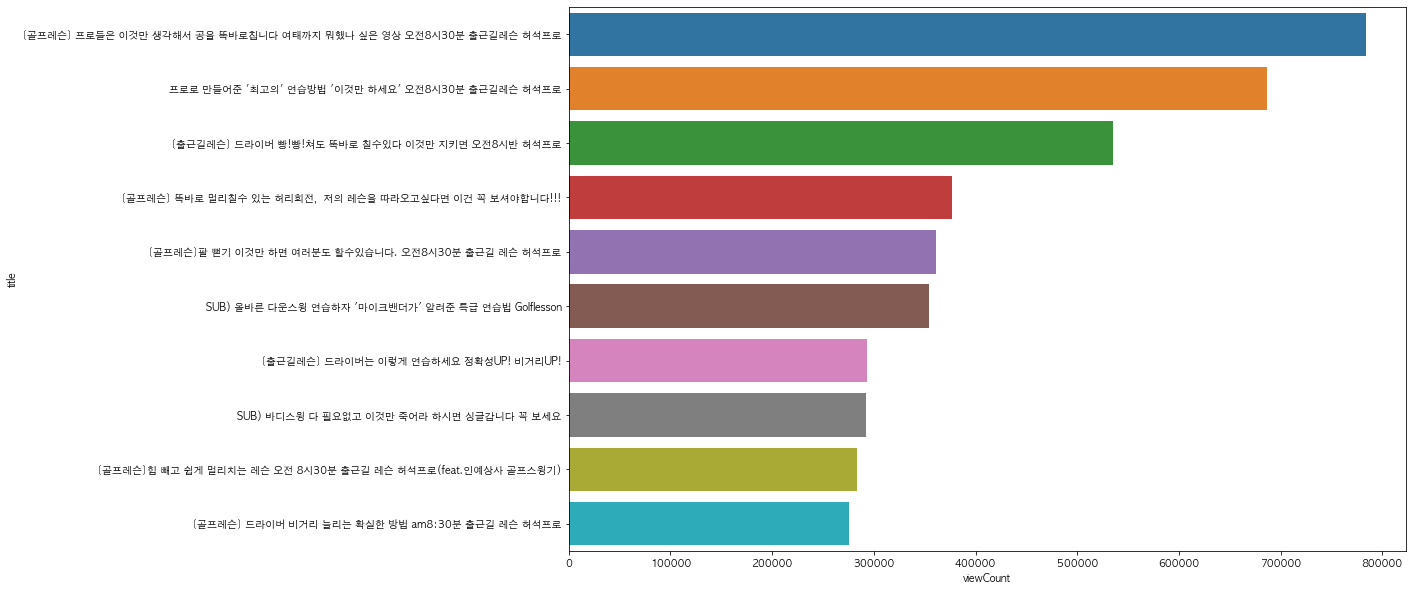

In [11]:
plt.figure(figsize=(15,10))
video_reset_index = video.reset_index()
sns.barplot(x='viewCount', y='title', data=video_reset_index.sort_values('viewCount', ascending=False)[:10])

In [12]:
df = video.reset_index()
df = df[['title', 'viewCount']].sort_values('viewCount', ascending=False)

In [13]:
import re
df['refined'] = df['title'].apply(lambda x:re.sub('[^가-힣\s0-9]', '', x))

In [14]:
sentences = df['refined'].values
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(sentences) # list of str or like
words = word_extractor.extract()

training was done. used memory 0.136 Gb
all cohesion probabilities was computed. # words = 1
all branching entropies was computed # words = 271
all accessor variety was computed # words = 271


In [15]:
from soynlp.tokenizer import LTokenizer
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [16]:
df['tokenized'] = df['refined'].apply(lambda x:tokenizer.tokenize(x,remove_r=True))

In [17]:
#20% 
thresh = int(len(df) *0.2)
df20 = df[:thresh]

In [18]:
words = []
for i in df20['tokenized']:
    for k in i:
        words.append(k)

In [19]:
from collections import Counter
count = Counter(words)
word_dict = dict(count)

## 채널별 상위 20%에 많이 등장하는 단어

In [20]:
sort_orders = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
	print(i[0], i[1])

허석프로 18
출근길레슨 15
골프레슨 10
레슨 8
오전8시30분 7
이것만 6
꼭 6
출근길 6
보세요 4
오전 4
8시30분 4
똑바로 3
오전8시반 3
허리회전 3
이렇게 3
비거리 3
이 3
영상 2
드라이버 2
이건 2
하면 2
쉽게 2
멀리치는 2
확실한 2
방법 2
절대 2
8시반 2
만큼 2
프로들이 2
하는 2
백스윙 2
사용법 2
프로들은 1
생각해서 1
공을 1
똑바로칩니다 1
여태까지 1
뭐했나 1
싶은 1
프로로 1
만들어준 1
최고의 1
연습방법 1
하세요 1
빵빵쳐도 1
칠수있다 1
지키면 1
멀리칠수 1
있는 1
저의 1
레슨을 1
따라오고싶다면 1
보셔야합니다 1
골프레슨팔 1
뻗기 1
여러분도 1
할수있습니다 1
올바른 1
다운스윙 1
연습하자 1
마이크밴더가 1
알려준 1
특급 1
연습법 1
드라이버는 1
연습하세요 1
정확성 1
바디스윙 1
다 1
필요없고 1
죽어라 1
하시면 1
싱글갑니다 1
골프레슨힘 1
빼고 1
허석프로인예상사 1
골프스윙기 1
늘리는 1
830분 1
빠르게 1
하면안됩니다 1
기억하세요 1
허리회전은 1
정답입니다 1
손이 1
내려와야 1
힘을 1
쓸수있습니다 1
허석프로닥치고스윙 1
김준년프로 1
콜라보 1
바디스윙은 1
체중이동 1
좌우로 1
안됩니다 1
지면반발력을 1
사용하자8시30분 1
골프레슨7아이언 1
5아이언 1
치는방법 1
힘 1
쓰기 1
위해 1
동작 1
1 1
프로들과 1
똑같은 1
궤도 1
만드는 1
연습으로 1
자신감 1
골프레슨왼손엄지의 1
기준 1
레슨프로독학골퍼라면 1
매주 1
월목 1
기억하시면 1
됩니다 1
이방법으로하면 1
자동입니다 1
완벽한 1
그립잡는방법 1
출근길레슨백스윙은 1
크게 1
두가지로 1
나눠집니다 1
보고나면 1
한결 1
편해집니다 1
장타 1
손목은 1
사용하셔야합니다출근길레슨 1
임팩이 1
다른 1
이유는 1
이것때문입니다 1
410 1
고민중이라면 1
한번 1
광고없이 1
리얼 1
리뷰 1
골프레슨바디스윙하려면 1
머리를 1
고정해야합니다 